In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
import numpy as np
import geotiler as gt
import nest_asyncio as na
import scipy.stats as st

# Задание 1

In [2]:
hotels = pd.read_csv("listings.csv") # Просто стандартно загружаем csv-файл
hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,1,42,2024-06-03,0.31,28,72,3,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,304.0,3,79,2024-06-24,0.48,1,116,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,211.0,1,128,2024-09-05,0.80,3,319,32,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.175170,Entire home/apt,300.0,5,20,2024-08-20,0.12,3,69,12,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,314.0,5,247,2024-09-02,1.46,3,241,37,HUTB-150671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,1229494875568799521,Luxurious Apartment with Private Gym in Barcelona,250042982,HiGuests,Eixample,la Dreta de l'Eixample,41.392830,2.175632,Entire home/apt,138.0,32,0,NaN,NaN,48,353,0,NaN
19478,1229565507103158854,Una Bonita Habitación Para Tres,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386560,2.175730,Private room,104.0,1,0,NaN,NaN,17,357,0,HUTB-729917
19479,1229569436604812436,Comoda Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386720,2.176880,Private room,65.0,1,0,NaN,NaN,17,359,0,HUTB-729917
19480,1229579149869166701,Bonita Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386933,2.175837,Private room,60.0,1,0,NaN,NaN,17,355,0,HUTB-729917


# Задание 2

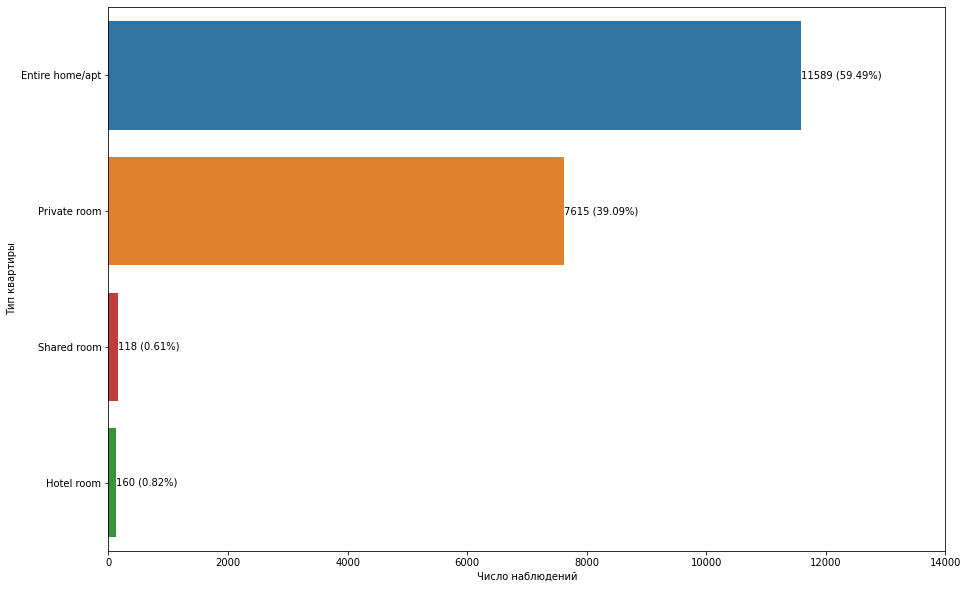

In [3]:
pt.figure(figsize = (15, 10)) # Создаём картинку, задаём её размеры
order = ["Entire home/apt", "Private room", "Shared room", "Hotel room"] # Тут я сделал не очень красиво, но так не запрещалось. Я просто вручную задал порядок, в котором будут отображаться наши столбцы
ax = sb.countplot(hotels, y = "room_type", hue = "room_type", order = order) # Сама функция отрисовки грифика, передаём ей первым аргументом датафрейм, в качестве второго выбираем у, так как нам надо
# чтобы график был горизонтальным, в качестве этого самого второго параметра передаём столбец, по которому и хотим столбцы сделать, третий параметр - по значениям какого столбца будем раскрашивать,
# четвёртый - это собственно порядок
labels = [len(hotels[hotels["room_type"] == room_type]) for room_type in order] # Тут я просто делаю список с размерами столбцов, используя цикл в одну строчку
for i in range(4): # Тут опять не оч красиво вышло, так как функции bar_label можно и списки сразу подавать, а не циклом по одному значению, но у меня почему-то не сработало списком. Этой функции
    pt.bar_label(ax.containers[i], [f"{labels[i]} ({round(labels[i]/sum(labels)*100, 2)}%)"]) # первым параметром я передаю столбец, а вторым - как его подписать. Для создания подписи я воспользовался
# f-строками, где можно удобно вставлять в строку код (например, вычисления), чтобы они проводились, после чего их результат вставляется в строку
pt.xlabel("Число наблюдений") # Подписываем ось х
pt.ylabel("Тип квартиры") # Подписываем ось у
pt.xlim(0, 14000) # Задаём границы оси х, чтобы лучше влезали подписи (ну и так в примере задания сделано)
pt.show()

# Задание 3

In [4]:
def convert_ava(number): # Создаём функцию, которая конвертирует нам число дней свободности квартир в диапазоны (то есть объединим вместе квартиры со схожей занятостью). Сделать это надо потому, что
# в задании нас просят использовать функцию, которая не подходит под данные. Нас просят использовать функцию, которая была сделана для категориальных переменных (их как раз моя написанная функция и
# создаёт), в то время как даны нам числовые пермененные (они поступают на вход моей функции). Это очень странно, так как вот этого шага с написанием собственной функции можно было бы легко избежать,
#используй мы нормальную функцию для построения гистограмм, которые как раз сами и дробят числовые данные на бины
    if number == 0: # Вся функция заключается просто в том, чтобы понять, в какой дапазон попадает число, и выдать этот диапазон
        return("0")
    elif number <= 30:
        return("1 - 30")
    elif number <= 60:
        return("31 - 60")
    elif number <= 90:
        return("61 - 90")
    elif number <= 120:
        return("91 - 120")
    elif number <= 150:
        return("121 - 150")
    elif number <= 180:
        return("151 - 180")
    elif number <= 210:
        return("181 - 210")
    elif number <= 240:
        return("211 - 240")
    else:
        return(">=241")

In [5]:
hotels["availability_changed"] = hotels["availability_365"].apply(convert_ava, 1) # Применяем нашу написанную функцию, чтобы создать новый столбец с диапазонами. Используем для этого функцию apply,
# которой на вход передаём написанную функцию и 1 в качестве второго аргумента, что означает, что применять нашу функцию надо построчно
hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,1,42,2024-06-03,0.31,28,72,3,HUTB-002062,61 - 90
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,304.0,3,79,2024-06-24,0.48,1,116,7,HUTB005057,91 - 120
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,211.0,1,128,2024-09-05,0.80,3,319,32,HUTB-001722,>=241
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.175170,Entire home/apt,300.0,5,20,2024-08-20,0.12,3,69,12,Exempt,61 - 90
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,314.0,5,247,2024-09-02,1.46,3,241,37,HUTB-150671,>=241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,1229494875568799521,Luxurious Apartment with Private Gym in Barcelona,250042982,HiGuests,Eixample,la Dreta de l'Eixample,41.392830,2.175632,Entire home/apt,138.0,32,0,NaN,NaN,48,353,0,NaN,>=241
19478,1229565507103158854,Una Bonita Habitación Para Tres,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386560,2.175730,Private room,104.0,1,0,NaN,NaN,17,357,0,HUTB-729917,>=241
19479,1229569436604812436,Comoda Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386720,2.176880,Private room,65.0,1,0,NaN,NaN,17,359,0,HUTB-729917,>=241
19480,1229579149869166701,Bonita Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386933,2.175837,Private room,60.0,1,0,NaN,NaN,17,355,0,HUTB-729917,>=241


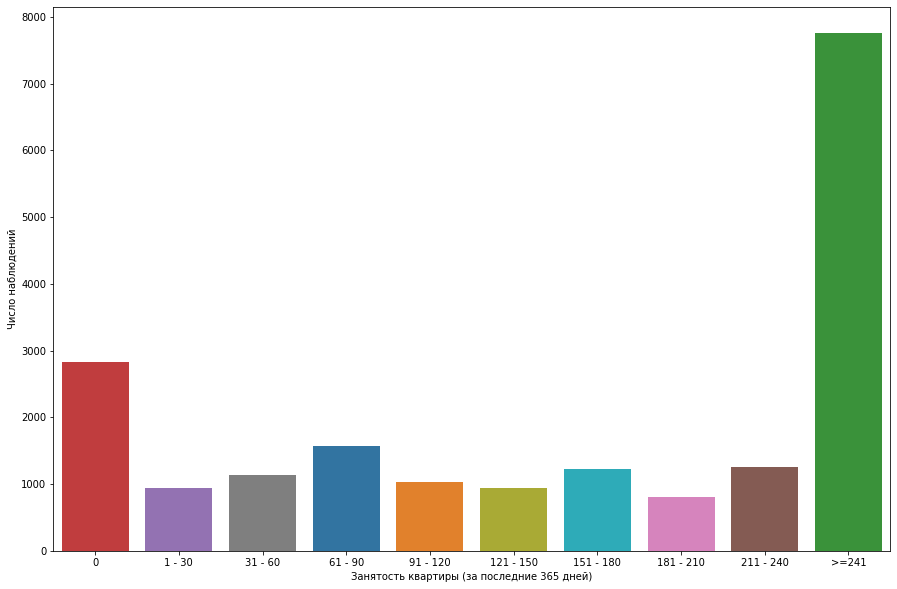

In [6]:
pt.figure(figsize = (15, 10)) # Дальше аналогично прошлой диаграмме рисуем новую
order = ["0", "1 - 30", "31 - 60", "61 - 90", "91 - 120", "121 - 150", "151 - 180", "181 - 210", "211 - 240", ">=241"]
sb.countplot(hotels, x = "availability_changed", hue = "availability_changed", order = order) # Тут главное отличие состоит в том, что диаграмма в этот раз должна быть вертикальной, поэтому в качестве
# второго аргумента берём х, а не у. Также нам не требуется вся эта морока с подписями столбцов, к счастью
pt.xlabel("Занятость квартиры (за последние 365 дней)")
pt.ylabel("Число наблюдений")
pt.show()

# Задание 4

In [7]:
def convert_license(license): # Здесь нам тоже надо преобразовать целевую колонку в соответствии с требованиями в задании
    if pd.isna(license): # Проверяем, является ли значение наном
        return("No license")
    elif license.startswith("Exempt"): # Проверяем, начинается ли строка с нужной подстроки
        return("Exeption")
    else:
        return("Has license")

In [8]:
hotels["license_changed"] = hotels["license"].apply(convert_license, 1) # Аналогично предыдущему заданию применяем нашу функцию
hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,1,42,2024-06-03,0.31,28,72,3,HUTB-002062,61 - 90,Has license
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,304.0,3,79,2024-06-24,0.48,1,116,7,HUTB005057,91 - 120,Has license
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,211.0,1,128,2024-09-05,0.80,3,319,32,HUTB-001722,>=241,Has license
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.175170,Entire home/apt,300.0,5,20,2024-08-20,0.12,3,69,12,Exempt,61 - 90,Exeption
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,314.0,5,247,2024-09-02,1.46,3,241,37,HUTB-150671,>=241,Has license
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,1229494875568799521,Luxurious Apartment with Private Gym in Barcelona,250042982,HiGuests,Eixample,la Dreta de l'Eixample,41.392830,2.175632,Entire home/apt,138.0,32,0,NaN,NaN,48,353,0,NaN,>=241,No license
19478,1229565507103158854,Una Bonita Habitación Para Tres,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386560,2.175730,Private room,104.0,1,0,NaN,NaN,17,357,0,HUTB-729917,>=241,Has license
19479,1229569436604812436,Comoda Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386720,2.176880,Private room,65.0,1,0,NaN,NaN,17,359,0,HUTB-729917,>=241,Has license
19480,1229579149869166701,Bonita Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386933,2.175837,Private room,60.0,1,0,NaN,NaN,17,355,0,HUTB-729917,>=241,Has license


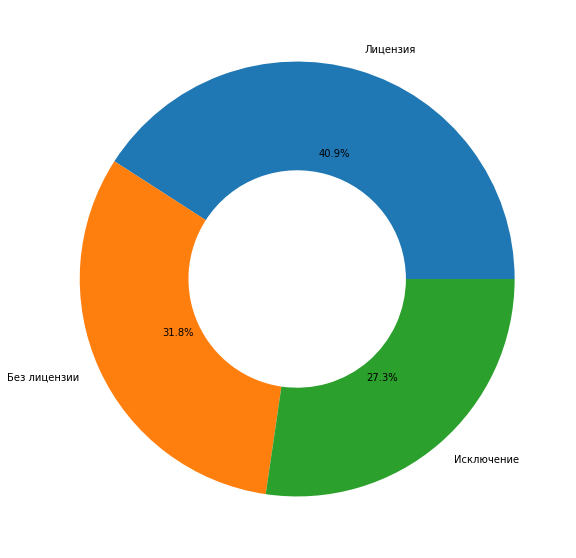

In [9]:
pt.figure(figsize = (15, 10))
values = hotels["license_changed"].value_counts() # Пайчарт принимает на вход числовые значения и рисует каждому значению долю круга, равную её доле от общей суммы значений. Поэтому просто набор слов
# нам надо преобразовать в подсчитанное число, сколько раз данное слово встречается в таблице. За это и отвечает данная функция
pt.pie(values, labels = ["Лицензия", "Без лицензии", "Исключение"], autopct = lambda x: f"{round(x, 1)}%", wedgeprops = {"width": 0.5}) # Рисуем сам пайчарт. Первым аргументом передаём ему наш набор
# чисел, вторым - подписи, третьим - подписываем проценты, делаем это через лямбда функцию, которая принимает на вход число, отсекает у него все знаки после запятой, кроме первого и приписывает значок
# процента, на вход этой лямбда функции будет подаваться заложенное в пайчарте число, которое и равно числу процентов, но некрасиво написанному. Последний параметр - это конкретный параметр, необходимый
# для того, чтобы сделать дырку в центре пайчарта
pt.show()

# Задание 5

In [10]:
def min_nights_change(number): # Функция для адаптации таблицы под нужды задания. Нам надо, чтобы все квартиры со сроком аренды 35 и выше были объединены в одну категорию
    if number >= 35:
        return("35+")
    else:
        return(str(number))

In [11]:
hotels["min_nights_diag"] = hotels["minimum_nights"].apply(min_nights_change, 1) # Приеняем функцию аналогично предыдущим ситуациям
hotels[hotels["min_nights_diag"] == "35+"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag
25,97529,Furnished one bedroom apartment with bathroom,497450,Francesc,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.408791,2.166066,Entire home/apt,47.0,...,67,2022-10-31,0.43,1,0,0,NaN,0,No license,35+
56,242335,BARCELONETA A · Barceloneta Beach Apartment SE...,297885449,ByMonths,Ciutat Vella,la Barceloneta,41.381130,2.188970,Entire home/apt,NaN,...,5,2022-07-31,0.03,17,52,0,Monthly rental only,31 - 60,Has license,35+
158,675175,FURNISED ROOM FOR RENT,3429484,Pamela,Nou Barris,la Prosperitat,41.442730,2.179850,Private room,NaN,...,0,NaN,NaN,2,87,0,NaN,61 - 90,No license,35+
200,737759,Room and private bathroom center Bc,3853819,Vanessa,Eixample,la Dreta de l'Eixample,41.395360,2.171740,Private room,NaN,...,1,2019-01-03,0.01,1,0,0,NaN,0,No license,35+
245,515230,LuxRent Apartment Num.15,2537484,Enrique,Ciutat Vella,el Raval,41.379490,2.163870,Entire home/apt,400.0,...,120,2022-04-03,0.83,5,365,0,NaN,>=241,No license,35+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,1227327729658552017,Sunlit Gardens,182547471,Joel,Sant Martí,el Besòs i el Maresme,41.413730,2.217580,Entire home/apt,86.0,...,0,NaN,NaN,20,365,0,NaN,>=241,No license,35+
19398,1227328468951325044,Urban Retreat Rambla Prim,182547471,Joel,Sant Martí,el Besòs i el Maresme,41.413350,2.215530,Entire home/apt,86.0,...,0,NaN,NaN,20,365,0,NaN,>=241,No license,35+
19399,1227330142865558106,Green Horizon,182547471,Joel,Sant Martí,el Parc i la Llacuna del Poblenou,41.401072,2.192863,Entire home/apt,422.0,...,0,NaN,NaN,20,365,0,NaN,>=241,No license,35+
19400,1227331023206679894,Oasis Suite,182547471,Joel,Sant Martí,el Parc i la Llacuna del Poblenou,41.398270,2.187090,Entire home/apt,104.0,...,0,NaN,NaN,20,365,0,NaN,>=241,No license,35+


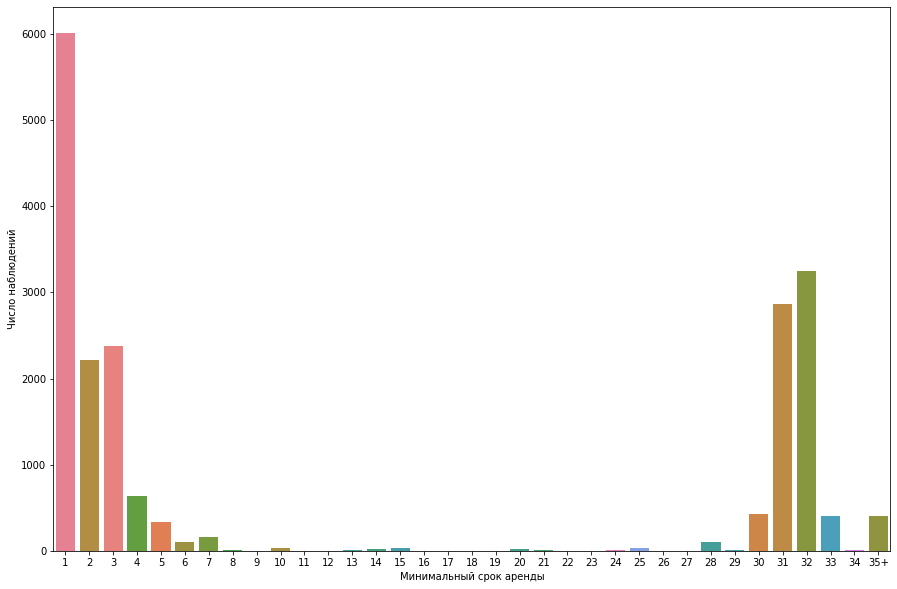

In [12]:
pt.figure(figsize = (15, 10)) # Строим график аналогично предыдущим заданиям
order = [str(x) for x in range(1, 35)] + ["35+"] # Делаем список для порядка отображения столбцов, используя цикл в одну строку
sb.countplot(hotels, x = "min_nights_diag", order = order, hue = "min_nights_diag")
pt.xlabel("Минимальный срок аренды")
pt.ylabel("Число наблюдений")
pt.show()

**Мы видим, что, начиная с 30 дней, резко растёт количество предложений. То есть, видимо, людям не очень хочется получать лицензию, а проще просто не сдавать квартиры в слишком краткосрочную аренду.**

# Задание 6

In [13]:
def host_count_change(host_id): # Создаём функцию, которая подготовит данные для диаграммы. На вход принимается айди владельца квартиры, после чего проверяется число квартир по специальному списку,
# который будет создан в следующей ячейке, после чего вносятся данные в таблицу, заменяя числа 10 и более на "10+"
    if host_count[host_id] >= 10:
        return("10+")
    else:
        return(str(host_count[host_id]))

In [14]:
host_count = hotels["host_id"].value_counts() # Команда, которая считает число квартир у каждого владельца. По этому списку и будет проверят число квартир функция, описанная выше
hotels["host_apart_count"] = hotels["host_id"].apply(host_count_change, 1) # Применяем функцию, как и прежде
hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag,host_apart_count
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,...,2024-06-03,0.31,28,72,3,HUTB-002062,61 - 90,Has license,1,10+
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.219750,Entire home/apt,304.0,...,2024-06-24,0.48,1,116,7,HUTB005057,91 - 120,Has license,3,1
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,211.0,...,2024-09-05,0.80,3,319,32,HUTB-001722,>=241,Has license,1,3
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.175170,Entire home/apt,300.0,...,2024-08-20,0.12,3,69,12,Exempt,61 - 90,Exeption,5,3
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,314.0,...,2024-09-02,1.46,3,241,37,HUTB-150671,>=241,Has license,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,1229494875568799521,Luxurious Apartment with Private Gym in Barcelona,250042982,HiGuests,Eixample,la Dreta de l'Eixample,41.392830,2.175632,Entire home/apt,138.0,...,NaN,NaN,48,353,0,NaN,>=241,No license,32,10+
19478,1229565507103158854,Una Bonita Habitación Para Tres,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386560,2.175730,Private room,104.0,...,NaN,NaN,17,357,0,HUTB-729917,>=241,Has license,1,10+
19479,1229569436604812436,Comoda Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386720,2.176880,Private room,65.0,...,NaN,NaN,17,359,0,HUTB-729917,>=241,Has license,1,10+
19480,1229579149869166701,Bonita Habitación Doble,575003839,Carlos Alberto,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.386933,2.175837,Private room,60.0,...,NaN,NaN,17,355,0,HUTB-729917,>=241,Has license,1,10+


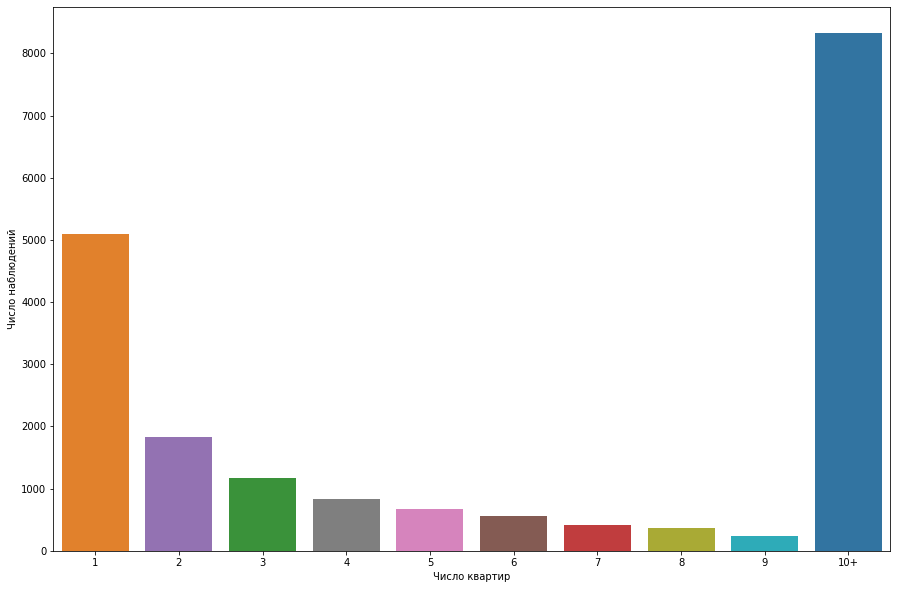

In [15]:
pt.figure(figsize = (15, 10)) # Строим диаграмму по тому же принципу
sb.countplot(data = hotels, x = "host_apart_count", order = [str(x) for x in range(1, 10)] + ["10+"], hue = "host_apart_count")
pt.xlabel("Число квартир")
pt.ylabel("Число наблюдений")
pt.show()

# Задание 7

In [16]:
hotels_sm = hotels[hotels["neighbourhood"] == "la Sagrada Família"] # Создаём новую таблицу на основе старой, где будут только квартиры из выбранного района (тоже взял саграду фамилию, чтобы сравнивать
# с примером)
hotels_sm

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag,host_apart_count
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,...,2024-06-03,0.31,28,72,3,HUTB-002062,61 - 90,Has license,1,10+
27,112538,✨Design Apt near Sagrada Familia / Shared terr...,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,301.0,...,2024-08-30,0.80,19,104,15,HUTB-000333,91 - 120,Has license,2,10+
28,117010,✨Spacious Flat near Sagrada Familia/Shared ter...,567180,Sandra,Eixample,la Sagrada Família,41.406470,2.174570,Entire home/apt,294.0,...,2024-08-16,0.36,19,102,11,HUTB000331,91 - 120,Has license,2,10+
29,118228,✨Bright apt views Sagrada Familia / Shared ter...,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,337.0,...,2024-08-09,0.39,19,96,12,HUTB-000328,91 - 120,Has license,2,10+
33,138055,🌞Apt best views of Sagrada Familia/Shared terrace,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,308.0,...,2024-09-01,0.83,19,106,18,HUTB000329,91 - 120,Has license,2,10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,1234681160481771541,"Blueground | Sagrada Familia, washer & a/c",447375626,Blueground,Eixample,la Sagrada Família,41.406489,2.169950,Entire home/apt,149.0,...,NaN,NaN,138,278,0,NaN,>=241,No license,32,10+
19457,1227580389543880620,Habitación en La Sagrada,515385655,Nr.Nasser,Eixample,la Sagrada Família,41.401540,2.178221,Private room,120.0,...,NaN,NaN,1,323,0,Exempt,>=241,Exeption,1,1
19469,1228714122559007809,165- Rossello 32 Apartment,396363,Alcam Apartments,Eixample,la Sagrada Família,41.404491,2.172240,Entire home/apt,134.0,...,NaN,NaN,68,266,0,NaN,>=241,No license,33,10+
19470,1228850312110853785,167. Rossello 13 Apartment,396363,Alcam Apartments,Eixample,la Sagrada Família,41.406160,2.172520,Entire home/apt,134.0,...,NaN,NaN,68,245,0,NaN,>=241,No license,33,10+


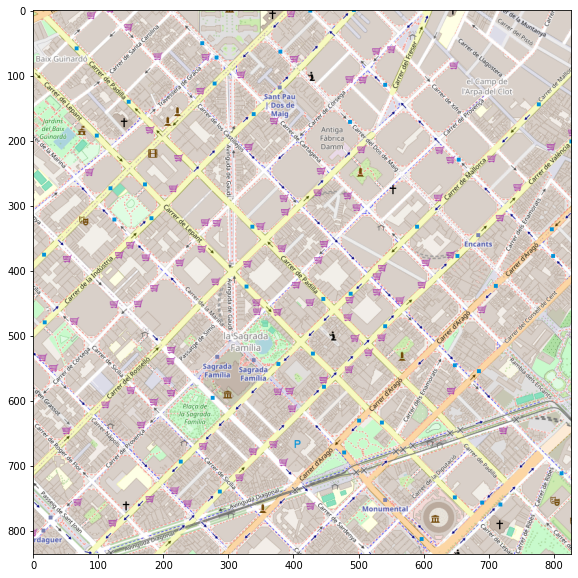

In [17]:
min_lon = min(hotels_sm["longitude"]) - 0.001 # Задаём крайние координаты карты. Берём минимумы и максимумы и немного добавляем (или отнимаем)
max_lon = max(hotels_sm["longitude"]) + 0.001
min_lat = min(hotels_sm["latitude"]) - 0.001
max_lat = max(hotels_sm["latitude"]) + 0.001
na.apply() # Используем костыль, без которого не заработает модуль geotiler в юпитере
geo_map = gt.Map(extent = (min_lon, min_lat, max_lon, max_lat), zoom = 16) # Далее команды из примера
img = gt.render_map(geo_map)
pt.figure(figsize = (15, 10)) # Делаем картинку, чтобы отрисовать карту
pt.imshow(img)
pt.show()

# Задание 8

In [18]:
hotels_sm[["img_lat", "img_lon"]] = hotels_sm[["longitude", "latitude"]].apply(geo_map.rev_geocode, 1, result_type = "expand") # Применяем функцию для конвертации планетарных координат в координаты
# рисунка. Используем функцию apply, которую я уже использовал в этой работе, только теперь применяем её сразу к двум столбцам, таким образом подавая значения их строк списком. Первым параметром
# указываем функцию, вторым "1", что говорит о том, что мы хотим получать данные построчно, а result_type = "expand" говорит о том, что результат функции (в нашем случае список) надо разбить на два
# столбца ("img_lat" и "img_lon")
hotels_sm

C:\Users\Иван\AppData\Local\Temp\ipykernel_25496\4216370032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_sm[["img_lat", "img_lon"]] = hotels_sm[["longitude", "latitude"]].apply(geo_map.rev_geocode, 1, result_type = "expand") # Применяем функцию для конвертации планетарных координат в координаты
C:\Users\Иван\AppData\Local\Temp\ipykernel_25496\4216370032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_sm[["img_lat", "img_lon"]] = hotels_sm[["longitude", "latitude"]].apply(geo_map.rev

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag,host_apart_count,img_lat,img_lon
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,194.0,...,28,72,3,HUTB-002062,61 - 90,Has license,1,10+,222.430628,439.954803
27,112538,✨Design Apt near Sagrada Familia / Shared terr...,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,301.0,...,19,104,15,HUTB-000333,91 - 120,Has license,2,10+,314.705316,379.684420
28,117010,✨Spacious Flat near Sagrada Familia/Shared ter...,567180,Sandra,Eixample,la Sagrada Família,41.406470,2.174570,Entire home/apt,294.0,...,19,102,11,HUTB000331,91 - 120,Has license,2,10+,313.307214,383.412511
29,118228,✨Bright apt views Sagrada Familia / Shared ter...,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,337.0,...,19,96,12,HUTB-000328,91 - 120,Has license,2,10+,314.705316,379.684420
33,138055,🌞Apt best views of Sagrada Familia/Shared terrace,567180,Sandra,Eixample,la Sagrada Família,41.406530,2.174600,Entire home/apt,308.0,...,19,106,18,HUTB000329,91 - 120,Has license,2,10+,314.705316,379.684420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,1234681160481771541,"Blueground | Sagrada Familia, washer & a/c",447375626,Blueground,Eixample,la Sagrada Família,41.406489,2.169950,Entire home/apt,149.0,...,138,278,0,NaN,>=241,No license,32,10+,98.004269,382.213308
19457,1227580389543880620,Habitación en La Sagrada,515385655,Nr.Nasser,Eixample,la Sagrada Família,41.401540,2.178221,Private room,120.0,...,1,323,0,Exempt,>=241,Exeption,1,1,483.461902,689.707114
19469,1228714122559007809,165- Rossello 32 Apartment,396363,Alcam Apartments,Eixample,la Sagrada Família,41.404491,2.172240,Entire home/apt,134.0,...,68,266,0,NaN,>=241,No license,33,10+,204.728256,506.405675
19470,1228850312110853785,167. Rossello 13 Apartment,396363,Alcam Apartments,Eixample,la Sagrada Família,41.406160,2.172520,Entire home/apt,134.0,...,68,245,0,NaN,>=241,No license,33,10+,217.770290,402.674260


# Задание 9

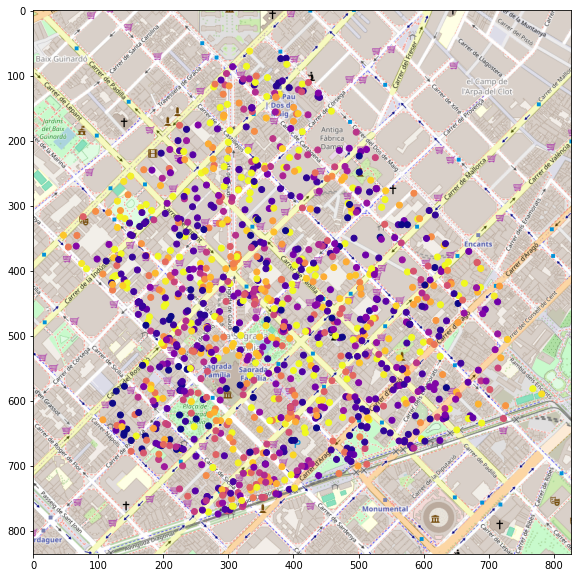

In [19]:
pt.figure(figsize = (15, 10)) # Создаём картинку
pt.imshow(img) # Отображаем карту
occ = hotels_sm['availability_365'] # Далее команды по инструкции из задания для формирования палитры цветов
colors = (100*(occ.max() - occ)/(occ.max()-occ.min())).astype(int)
pt.scatter(hotels_sm["img_lat"], hotels_sm["img_lon"], c = colors, cmap = "plasma") # Собственно команда для отрисовки точек. Первыми параметрами принимает координаты точек. Далее параметр с - это
# собственно те цвета, что мы делали выше. Cmap - это палитра, которую попросили в задании изменить на любую, кроме той, что по умолчанию
pt.show()

# Задание 10

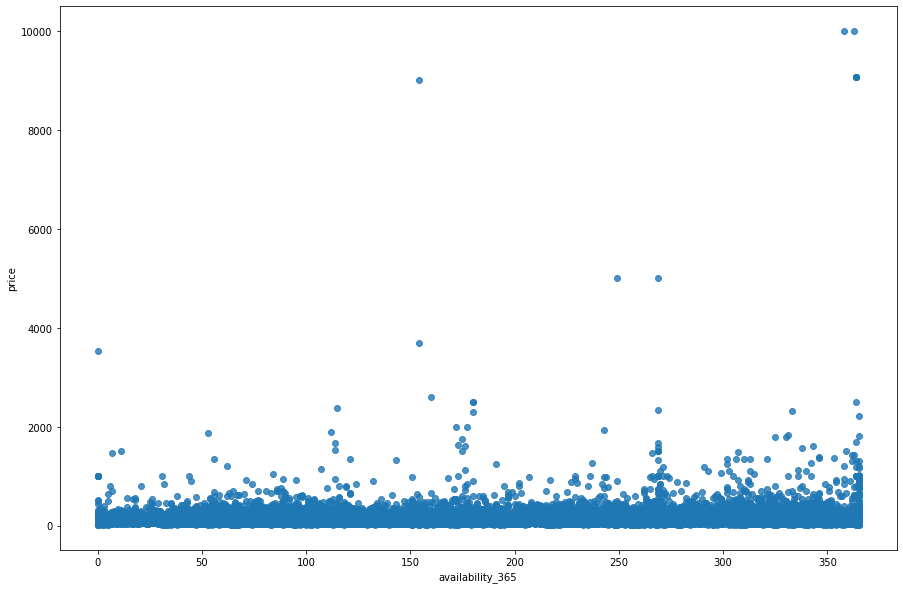

In [20]:
pt.figure(figsize = (15, 10))
sb.regplot(hotels, x = "availability_365", y = "price") # Regplot рисуется в целом по общим правилам сиборна. Первым параметром датасет, далее указываем, какие колонки откладываем по х и у
pt.show()

In [44]:
st.linregress(hotels[["availability_365", "price"]].dropna()) # Посчитал ещё через scipy.stats, чтобы узнать конкретные значения корреляции и p-value. Корреляция - rvalue.

LinregressResult(slope=0.10533756822125456, intercept=146.70713232391412, rvalue=0.04374225380627902, pvalue=5.500963633217024e-08, stderr=0.01937421259357262, intercept_stderr=4.552995705509229)

**Корреляция около 0. P-value низкое, что говорит о том, что корреляция всё-таки не ровно 0. То есть есть очень слабая положительная корреляция.**

# Задание 11

In [22]:
room_type_group = hotels.pivot_table("id", "neighbourhood_group", "room_type", lambda x: len(x)) # Делаем сводную таблицу. Эта функция в качестве рядов новой таблицы берёт значения из одной колонки старой
# таблицы, в качестве столбцов значения другой колонки старой таблицы, после чего аггрегирует все строки старой таблицы, отвечающие условиям новых рядов и столбцов, функцией, котороую также можно задать.
# Я задал функцию, которая просто считает длину списка аргуметов, которые ей передали. Так как ей передаются значения старой таблицы, то по сути она просто считает общее число элементов, отвечающих
# новым рядам и столбцам. Таким образом считается число квартир, расположенных в нужной группе районов и являющиеся квартирами определённого типа.
room_type_group

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Ciutat Vella,2589.0,23.0,1946.0,7.0
Eixample,4306.0,73.0,2428.0,75.0
Gràcia,1048.0,11.0,577.0,17.0
Horta-Guinardó,280.0,NaN,293.0,2.0
Les Corts,265.0,NaN,133.0,4.0
Nou Barris,66.0,NaN,153.0,2.0
Sant Andreu,131.0,NaN,171.0,16.0
Sant Martí,1092.0,3.0,692.0,21.0
Sants-Montjuïc,1137.0,8.0,844.0,8.0


In [23]:
room_type_group = room_type_group.fillna(0) # Здесь я просто заменяю наны из прошлой таблицы на 0, так как с нанами плохо работает следующая функция построения графика
room_type_group

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Ciutat Vella,2589.0,23.0,1946.0,7.0
Eixample,4306.0,73.0,2428.0,75.0
Gràcia,1048.0,11.0,577.0,17.0
Horta-Guinardó,280.0,0.0,293.0,2.0
Les Corts,265.0,0.0,133.0,4.0
Nou Barris,66.0,0.0,153.0,2.0
Sant Andreu,131.0,0.0,171.0,16.0
Sant Martí,1092.0,3.0,692.0,21.0
Sants-Montjuïc,1137.0,8.0,844.0,8.0


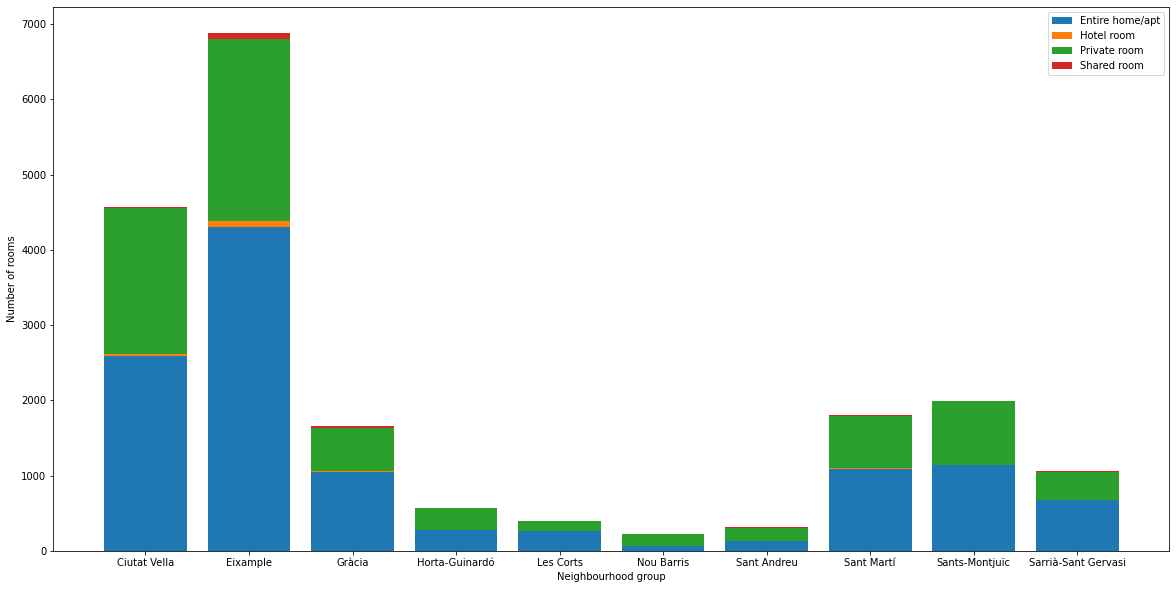

In [24]:
pt.figure(figsize = (20, 10))
bottom = np.zeros(len(room_type_group)) # Здесь мы будем по циклу надстраивать новые столбики на старых, для этого нам надо корректно задавать им нижнюю границу, то есть на чём они будут стоять. Для этого
# и есть данная переменная
for room_type in room_type_group.columns: # Проходимся циклом по всем типам квартир. На каждой итерации мы будем добавлять новые столбики, соответствующие новому типу квартир
    height = room_type_group[room_type] # Задаём высоту столбиков, равную просто числу квартир данного типа в данной группе районов
    pt.bar(room_type_group.index, height, bottom = bottom, label = f"{room_type}") # Рисуем столбики. Первым параметром мы передаём общее число столбиков и их подписи, которые в нашем случае 
# соответствуют группам районов. Второй параметр - высота столбиков. Третий параметр - на какой высоте будут располагаться столбики. Четвёртый параметр - обозначение столбика в легенде.
    bottom += height # Сдвигаем основание столбиков на высоту старых столбиков, чтобы новые располагались поверх старых
pt.legend() # Добавляем легенду, чтобы было понятно, что вообще нарисовано
pt.xlabel("Neighbourhood group")
pt.ylabel("Number of rooms")
pt.show()

# Задание 12

In [25]:
hotels.pivot_table("availability_365", "neighbourhood_group").sort_values("availability_365", ascending = False) # Действуем аналогично прошлому пункту. Строим сводную таблицу, но не указываем колонку
# старой таблицы, чьи значения должны стать новыми колонками. Из-за этого колонка у нас только одна. В качестве аггрегирующей функции берём среднее по значениям availability, что и есть требование
# задания

,availability_365
neighbourhood_group,
Sarrià-Sant Gervasi,195.797361
Eixample,183.318221
Gràcia,181.335148
Ciutat Vella,173.699452
Sant Martí,172.691925
Sants-Montjuïc,171.025038
Horta-Guinardó,162.426087
Nou Barris,161.977376
Sant Andreu,154.446541


**Самой популярной группой районов является Sarrià-Sant Gervasi**

# Задание 13

In [26]:
hotels.pivot_table("price", "neighbourhood_group").sort_values("price", ascending = False) # Действует абсолютно аналогично предыдущему пункту, только с другим столбцом

,price
neighbourhood_group,
Eixample,199.697576
Les Corts,179.356250
Sant Martí,177.820318
Sants-Montjuïc,170.506641
Gràcia,157.574815
Sarrià-Sant Gervasi,153.558426
Ciutat Vella,137.045547
Horta-Guinardó,110.694954
Sant Andreu,87.226496


In [27]:
hotels.sort_values("price", ascending = False).head(5) # Сортируем квартиры по цене, чтобы увидеть самую дорогую

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag,host_apart_count
19285,1231711118201011175,AB Les Corts II,4459553,AB Apartment Barcelona,Les Corts,les Corts,41.384170,2.133101,Entire home/apt,9999.0,...,NaN,NaN,191,358,0,HUTB-000000,>=241,Has license,1,10+
13084,867256504774715226,Amazing loft-style apartment in Las Ramblas,509555992,Lofts,Ciutat Vella,el Barri Gòtic,41.381193,2.173917,Entire home/apt,9999.0,...,NaN,NaN,1,363,0,NaN,>=241,No license,32,1
15728,1060268743089157821,Pierre Et Vacances - Studio 4 Personnes Standard,540456518,Pierre Et Vacances,Sants-Montjuïc,Sants - Badal,41.374703,2.124156,Entire home/apt,9059.0,...,NaN,NaN,4,364,0,HUTB-005412,>=241,Has license,1,4
15727,1060266855327829744,Pierre Et Vacances - Appartement 5 personnes -...,540456518,Pierre Et Vacances,Sants-Montjuïc,Sants - Badal,41.375820,2.123460,Entire home/apt,9059.0,...,NaN,NaN,4,364,0,HUTB-005414,>=241,Has license,1,4
15726,1060266644272581285,Pierre Et Vacances - Appartement 4 personnes -...,540456518,Pierre Et Vacances,Sants-Montjuïc,Sants - Badal,41.376399,2.124108,Entire home/apt,9059.0,...,NaN,NaN,4,364,0,HUTB-005526,>=241,Has license,1,4


**В задании спрашивается, в каком районе находится самая дорогая квартира, что похоже на опечатку, так как средние значения мы считали для групп районов. Поэтому отвечать я буду про группы районов. Если вдруг не опечатка, то в приведённой таблицы для самых дорогих квартир перечислены и районы тоже. <br> Квартиры с самой высокой ценой аренды находятся в группах районов Les Corts и Ciutat Vella, в то время как группа районов с самой высокой средней ценой аренды - это Eixample.**

# Задание 14

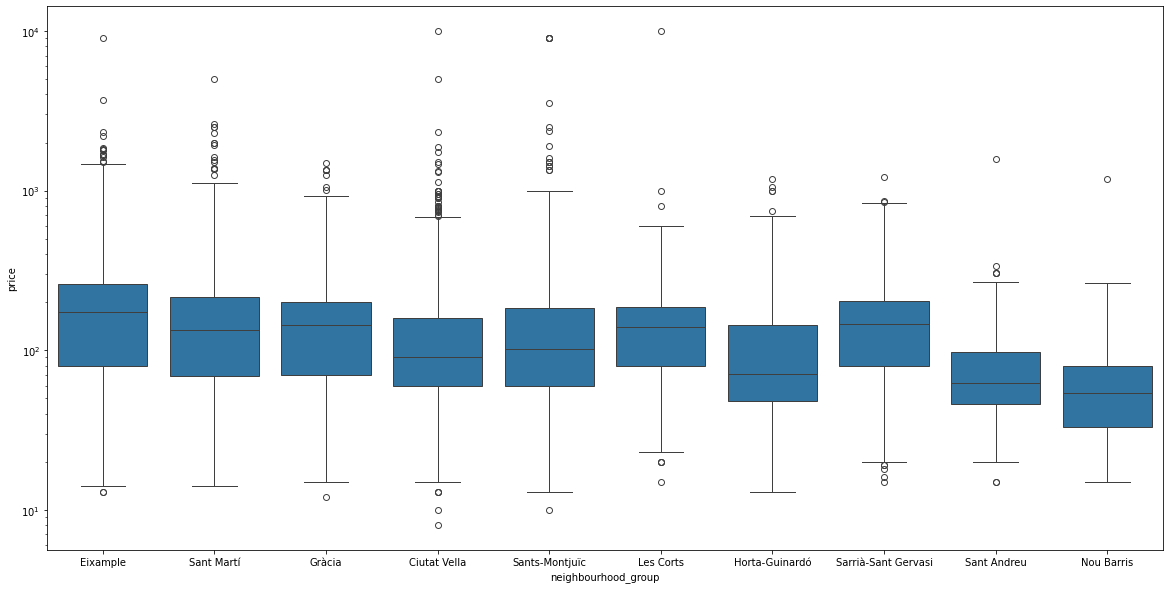

In [28]:
pt.figure(figsize = (20, 10))
sb.boxplot(hotels, x = "neighbourhood_group", y = "price", log_scale = True) # Строим боксплот, он строится в целом как и все сиборновские графики, по тому же паттерну. Сначала датафрейм, потом нужные нам
# столбцы. Также применяем логарифмическую шкалу, чтобы хоть что-то было видно
pt.show()

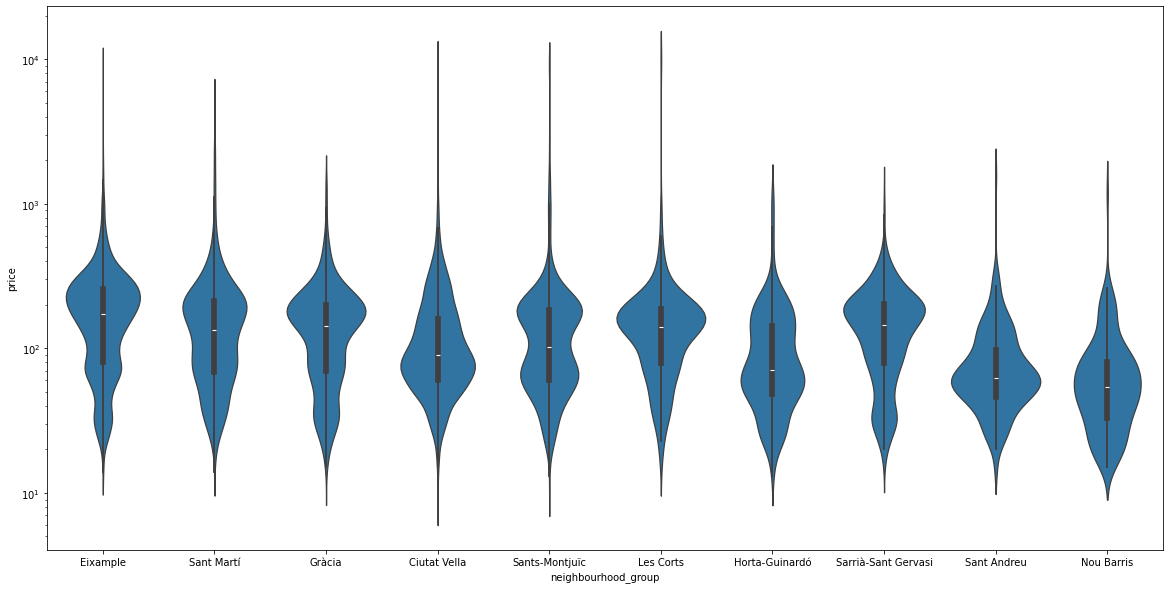

In [29]:
pt.figure(figsize = (20, 10))
sb.violinplot(hotels, x = "neighbourhood_group", y = "price", log_scale = True) # Всё абсолютно аналогично предыдущему графику
pt.show()

**Боксплот лучше отображает выбросы, так как он их показывает точками, а не линиями. Из-за этого чётко видно, где именно находится выброс. В остальном, мне кажется, боксплот уступает. <br> Также я вынужден был применить логарифмическую шкалу, так как иначе просто ничего не видно.**

# Задание 15

**Имеют ли цены на квартиры в Барселоне нормальное распределение? Посмотрим на графике, а также применим статистический тест.**

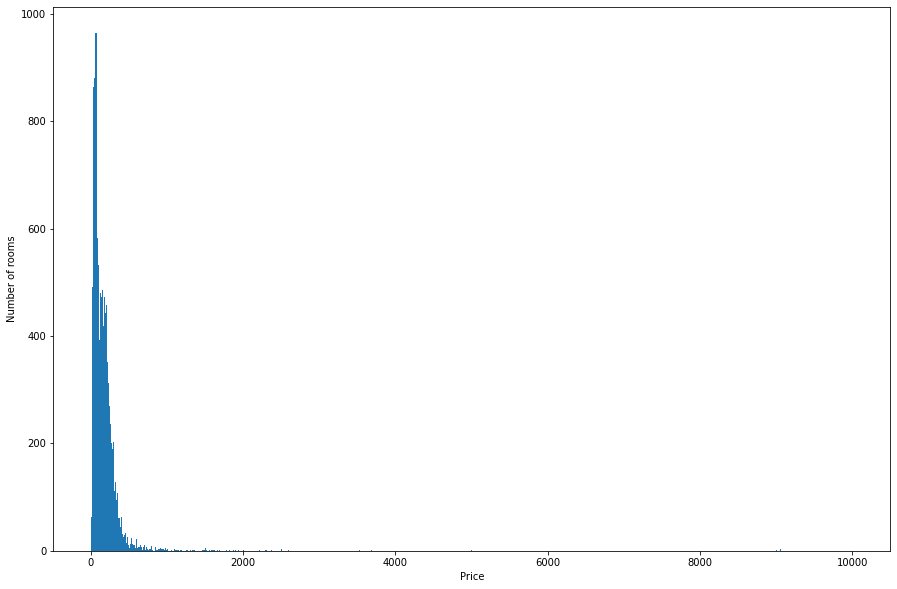

In [30]:
pt.figure(figsize = (15, 10)) # Строим стандартную гистограмму
pt.hist(hotels["price"], bins = 1000) # В качестве параметров передаём просто саму величину и число бинов, так как то, что строилось по умолчанию, меня не устроило
pt.xlabel("Price")
pt.ylabel("Number of rooms")
pt.show()

**Картина странная, выглядит так, как будто очень дорогие квартиры сильно сбивают график. Есть два варианта решения этой проблемы: отсечь самые дорогие квартиры, либо ввести логарифмическую шкалу. Попробуем и то, и то.**

In [31]:
cheap_hotels = hotels.sort_values("price").iloc[:round(len(hotels)*0.70), :] # Сортируем таблицу по ценам, после чего берём первые 0.7 длины таблицы, то есть 70% самых дешёвых квартир
cheap_hotels

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_changed,license_changed,min_nights_diag,host_apart_count
1759,6944660,Suite O N E,14494029,Maria Teresa,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.384349,2.182284,Private room,8.0,...,NaN,NaN,2,297,0,NaN,>=241,No license,31,2
6108,33680591,"Park view, relaxing and cozy apartment double ...",44445863,Angelo,Sants-Montjuïc,Hostafrancs,41.377290,2.141910,Private room,10.0,...,2024-07-25,0.70,1,260,2,Exempt,>=241,Exeption,31,1
11891,752653234797210159,Beates-1-1 Habitación ubicada en Barcelona,461820156,Selling,Ciutat Vella,el Barri Gòtic,41.385243,2.176284,Private room,10.0,...,2024-08-01,0.81,53,158,1,NaN,151 - 180,No license,32,10+
2014,8535939,Shared room 1 Rambla Catalunya,44913823,Karla,Gràcia,la Vila de Gràcia,41.398860,2.156550,Shared room,12.0,...,2022-11-15,1.91,11,352,0,Exempt,>=241,Exeption,31,10+
13242,883524014555399743,XS interior room FOR GIRLS!,316455039,Pauline,Ciutat Vella,el Raval,41.381883,2.165078,Private room,13.0,...,NaN,NaN,2,219,0,NaN,211 - 240,No license,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,31046927,CLASSBEDROOM PORT RAMBLAS 2,6099660,ClassBedroom,Ciutat Vella,el Raval,41.378370,2.173800,Entire home/apt,290.0,...,2024-08-25,1.50,26,309,17,HUTB-042738,>=241,Has license,1,10+
52,234375,ATTIC VIEWS (Sagrada Familia),1227290,Francesca,Eixample,el Fort Pienc,41.399700,2.174888,Entire home/apt,290.0,...,2024-08-26,1.20,1,323,24,HUTB-003754,>=241,Has license,8,1
8287,45967884,Comfortable Two-bedroom apartment,5614931,Fisa Rentals,Eixample,la Dreta de l'Eixample,41.391160,2.171140,Entire home/apt,291.0,...,2024-08-12,0.50,39,46,13,HUTB-003560,31 - 60,Has license,1,10+
4225,21721983,Nice and quiet 2 bedroom apartment,158023606,Habitat Apartments,Eixample,el Fort Pienc,41.392310,2.179850,Entire home/apt,291.0,...,2024-08-04,1.38,141,334,5,HUTB-003662,>=241,Has license,1,10+


**Получили таблицу 70% самых дешёвых отелей (если брать больше, то картина сильно не меняется). Попробуем теперь построить график.**

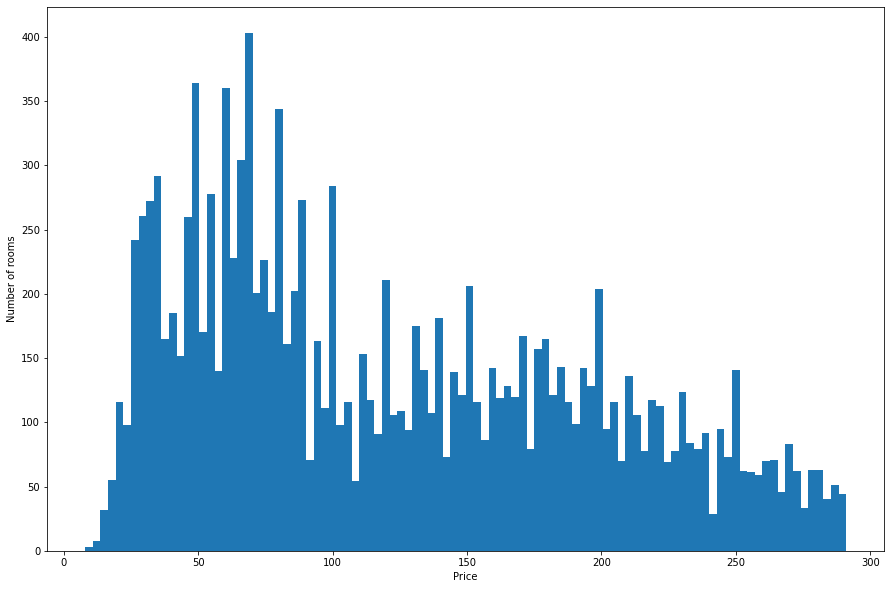

In [32]:
pt.figure(figsize = (15, 10)) # Точно так же строим новую гистограмму, взяв за основу обрезанные данные
pt.hist(cheap_hotels["price"], bins = 100)
pt.xlabel("Price")
pt.ylabel("Number of rooms")
pt.show()

**Итак, картина стала сильно лучше. Однако, во-первых, визуально это не очень похоже на нормальное распределение, а во-вторых, нам пришлось отсечь приличное число квартир, из-за чего уже в принципе тяжело будет назвать исключённые случаи выбросами. Но всё же применим формальный статистический тест.**

In [33]:
st.kstest(cheap_hotels["price"], "norm", (np.mean(cheap_hotels["price"]), np.std(cheap_hotels["price"]))) # Применяем тест Колмогорова - Смирнова. Более простой Шапиро - Уилк нам не подходит, так как
# число квартир у нас больше 5000. Тест Колмогорова - Смирнова сравнивает два распределения, в данном случае наше и нормальное, которому мы передали выборочное среднее и выборочное стандартное отклонение.
# Первым параметром идёт наше распределение, вторым нормальное, третьим - параметры для нормального распределения (выборочное среднее и стандартное отклонение)

KstestResult(statistic=0.1152799817406101, pvalue=2.447762945798584e-158)

**P-value имеет крайне низкие значения, это точно не нормальное распределение. <br> Теперь попробуем сделать логарифмическую шкалу.**

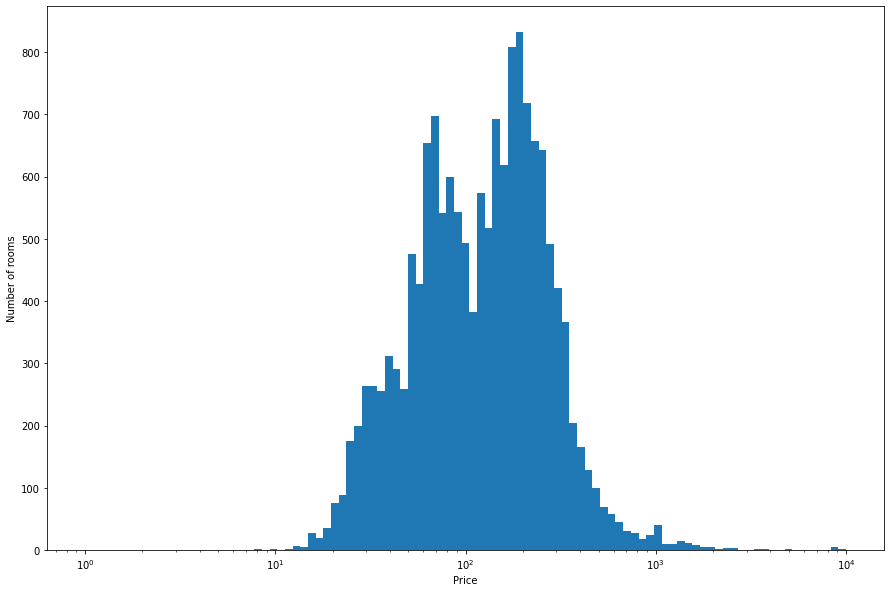

In [34]:
pt.figure(figsize = (15, 10)) # Строим новую гистограмму аналогично предыдущим
pt.hist(hotels["price"], bins = np.geomspace(1, max(hotels["price"]), 100)) # Отличие в построении бинов. Мы строим их с помощью функции geomspace, которая как раз и генерирует числа (границы бинов)
# на основании логарифмической шкалы
pt.xscale("log") # Включаем отображение логарифмической шкалы на графике
pt.xlabel("Price")
pt.ylabel("Number of rooms")
pt.show()

**Это уже больше похоже на нормальное распределение. Проведём тест. Если подтвердится, что это нормальное распределение, это будет означать, что наша искомая величина имеет логнормальное распределение.**

In [43]:
st.kstest(np.log(hotels["price"].dropna()), "norm", (np.mean(np.log(hotels["price"].dropna())), np.std(np.log(hotels["price"].dropna())))) # Аналогично применяем тест Колмогорова - Смирнова
# к логарифмическим шкалам

KstestResult(statistic=0.04944950804859194, pvalue=3.267761340538074e-33)

**Таким образом мы вынуждены отвергнуть нулевую гипотезу о том, что это нормальное распределение. А значит исходное распределение не логнормальное. Но всё равно нам удалось добиться того, чтобы распределение хорошо выглядело на картинке.**